In [180]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->



In [182]:
...

Ellipsis

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [183]:
df = pd.read_csv('./AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [184]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [185]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['reviews_per_month'])
y = df['reviews_per_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

1. There are quite a few `np.nan` entries present throughout the set especially in the columns relating to reviews. While there is no immediate discernible pattern as to why these entries contain `np.nan` values for the reviews columns a plausible hypothesis could be that these properties are relatively new listings and as such haven't seen many or any guests yet. Luckily there are no "?" as missing values that we have to replace which saves some work in terms of data cleaning.
   
2. Upon initial inspection of the target column `reviews_per_month` I noted that the maximum value present is 58.5 reviews per month which is a little odd considering there are only at most 31 days a month meaning the property is getting more than a review per day in each month. The minimum value for a property actually getting reviews is 0.01 with the average being ~1.37 from this we can gather that on average it seems like most properties either are fairly vacant or the renters are simply not leaving reviews after their stay.
   
3. Based on the explatory analysis from the dataset summary another observation I was able to make was what features a typical room would have. From the summary I was able to find the most frequent room type is an Entire home/apt with the most frequent neighborhood group being Manhattan. In addition the typical (mean) price is ~$151.53 a night. Hence a typical listing would comprise of values for their respective features.

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This summary gives a good indication on which features have null values so we know to apply imputation or drop the feature as well as giving the data type of the features which helps with categorizing the features for the column transformer

In [187]:
X.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.000000,227.000000


This summary provides the range of the numeric features and we can determine if those features need scaling

In [188]:
y.describe(include='all')

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Summary for y shows count is less than X so there is missing values as well as the average reviews for all the entries

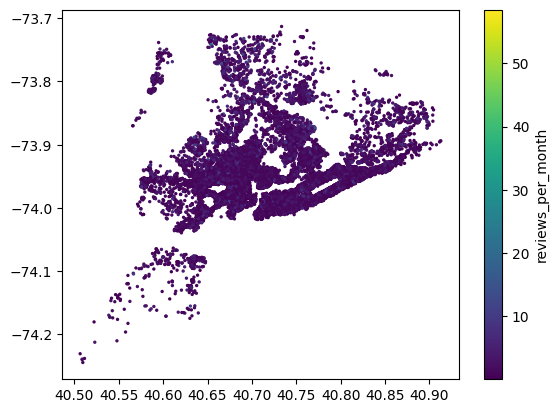

In [189]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X['latitude'], X['longitude'], c=y, s=2)
cbar= plt.colorbar(scatter)
cbar.set_label('reviews_per_month')
plt.show()

This plot show the coordinates where reviews are being made as well as the frequency that the reviews are made and gives insight on the geographical influnence on the target.

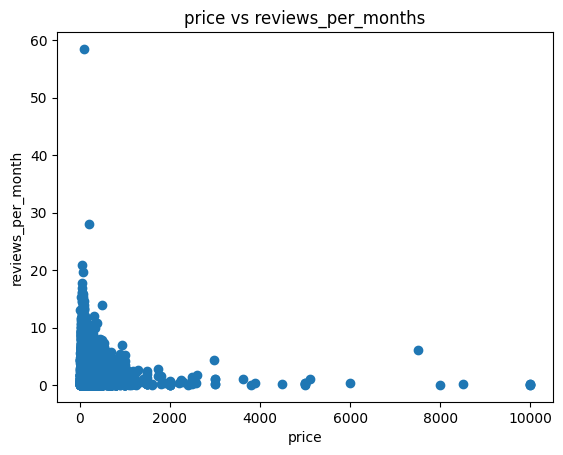

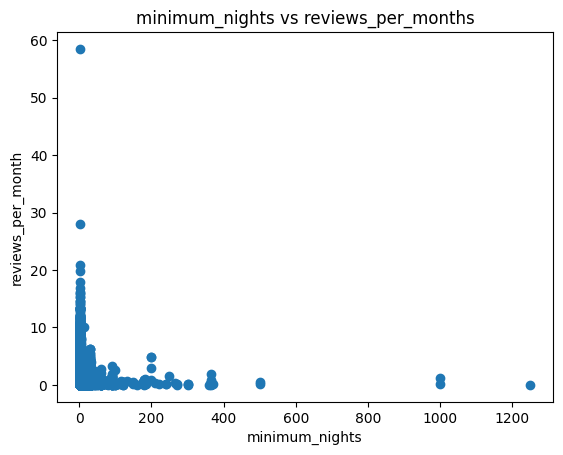

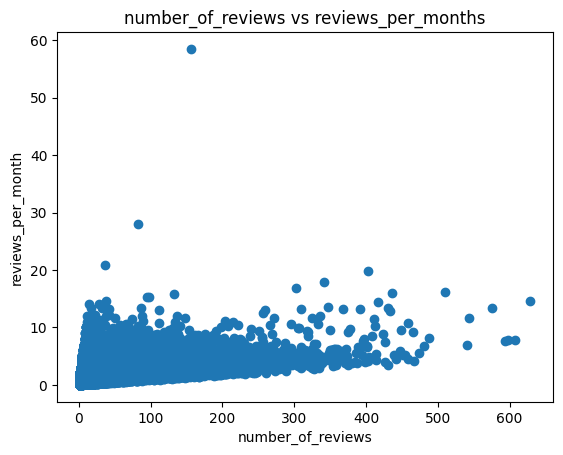

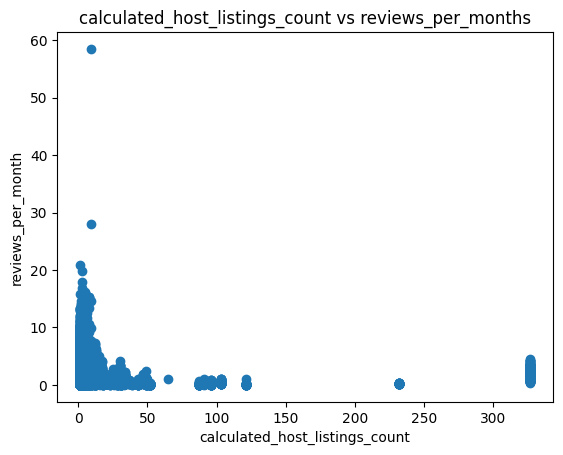

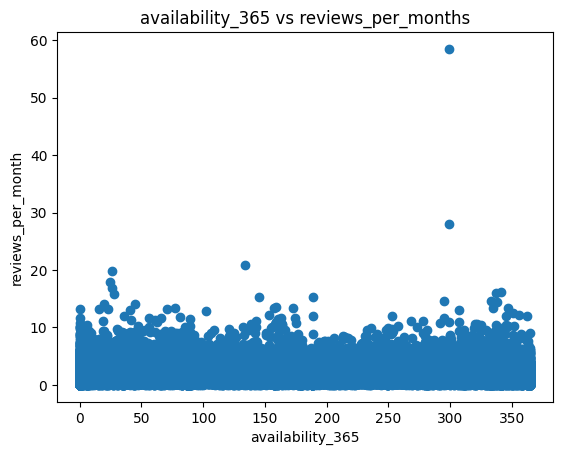

In [190]:
numeric_features_for_visualization = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
for feature in numeric_features_for_visualization:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('reviews_per_month')
    plt.title(feature + ' vs reviews_per_months')
    plt.show()

<BarContainer object of 3 artists>

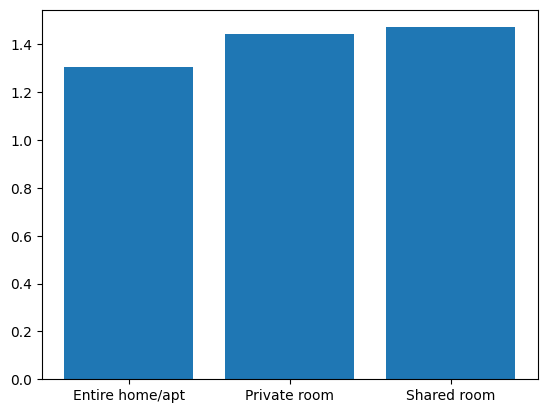

In [191]:
grouped = df.groupby('room_type')['reviews_per_month'].mean().reset_index()

room_types = grouped['room_type']
averages = grouped['reviews_per_month']

plt.bar(room_types, averages)

<BarContainer object of 3 artists>

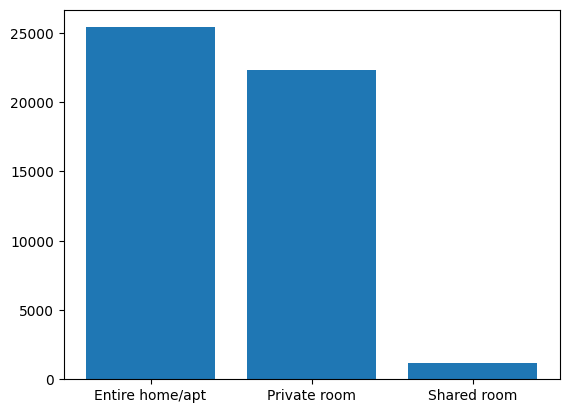

In [192]:
room_type_counts = X['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)

These plots of numeric and categorical features gives a surface level look at the relation of each feature to the target

Summary
There are features with missing values, numerical features need to be scaled.

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [193]:
X = df.drop(columns=['reviews_per_month'])
X = X.assign(
    total_cost= X['price'] * X['minimum_nights']
)
X = X.assign(
    has_reviews = df['last_review'].notnull()
)
X.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,total_cost,has_reviews
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365,149,True
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355,225,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,450,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,1,194,89,True
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,1,0,800,True


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Most likely id and host id are not relevant for prediction and should be categorized as drop features

The same applies for name and hostname and should be part of drop features

neighborhood_group and neighborgood should be categorical features and preprocessed using OHE

latitude and longitude are numeric features and need to be scaled

room_type could be either categorical or ordinal. I think an entire house will be more desirable than a shared room with private room in the middel, so it will be ordered that way using ordinal encoder.

price, minimum_nights, number_of_reviews and crossed features are numeric features and need to be scaled

Last_review has many null values. Also it's a date type which I don't believe we've touched on yet. Since I've already made a new binary feature has_review I will drop last_review. 

calculated_host_listings_count and availability_365 are numeric features and need to be scaled

y has less counts than X so there must be missing values. The number of entries of y corresponds to the number of entries in the feature column last_review, so I suspect these entries simply do not have any reviews. The Nan entries should be replaced with 0

In [271]:
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'total_cost']
categorical_features = ['neighbourhood_group', 'neighbourhood']
ordinal_features =['room_type']
binary_features = ['has_reviews']
drop_features = ['id', 'host_id', 'name', 'host_name', 'last_review', 'number_of_reviews']

In [196]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

room_type_order = ['Shared room', 'Private room', 'Entire home/apt']
ct = make_column_transformer(
    (
        (make_pipeline(SimpleImputer(), StandardScaler())),
        numeric_features
    ),
    (OneHotEncoder(handle_unknown='ignore', dtype=int), categorical_features),
    (OrdinalEncoder(categories=[room_type_order], dtype=int), ordinal_features),
    (OneHotEncoder(drop='if_binary', dtype=int), binary_features),
    ('drop', drop_features)
)

In [197]:
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [258]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, cross_validate

dummy = DummyRegressor()
dummy_pipe = make_pipeline(
    ct, dummy
)
dummy_scores = cross_validate(dummy_pipe, X_train, y_train, cv=10, return_train_score=True)
dummy_results = pd.DataFrame(dummy_scores)
dummy_results

,fit_time,score_time,test_score,train_score
0,0.020522,0.004265,-0.000024,0.0
1,0.021042,0.004470,-0.000029,0.0
2,0.019546,0.004151,-0.000272,0.0
3,0.019654,0.004787,-0.000069,0.0
4,0.020993,0.004136,-0.000295,0.0
5,0.019434,0.003905,-0.000198,0.0
6,0.021241,0.004616,-0.000167,0.0
7,0.019254,0.003786,-0.000039,0.0
8,0.018693,0.003841,-0.000525,0.0
9,0.019015,0.003973,-0.002474,0.0


In [259]:
dummy_scores['test_score'].mean()

-0.0004092519586873733

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [240]:
from sklearn.linear_model import Ridge

linear_pipe = make_pipeline(
    ct, Ridge()
)
linear_scores = cross_validate(linear_pipe, X_train, y_train, cv=10, return_train_score=True)
linear_results = pd.DataFrame(linear_scores)

In [201]:
linear_results #before hyperparameter optimisation

,fit_time,score_time,test_score,train_score
0,0.141862,0.005899,0.209639,0.203690
1,0.094873,0.005540,0.209170,0.203775
2,0.086278,0.005760,0.203190,0.204392
3,0.097199,0.005873,0.198413,0.204882
4,0.157167,0.005451,0.151626,0.211865
5,0.175767,0.005442,0.176891,0.207219
6,0.109055,0.006287,0.201640,0.204533
7,0.090472,0.005946,0.201251,0.204711
8,0.135683,0.005665,0.207217,0.203734
9,0.082716,0.005598,0.171751,0.207289


In [241]:
linear_scores['test_score'].mean()

0.19307872296561784

In [202]:
#adapted from lecture 7
alpha_dict = {
    'alpha': 10.0** np.arange(-3, 6, 1),
    'mean_train_scores': [],
    'mean_cv_scores': [],
    'train_score_std': [],
    'cv_score_std': []
}
for alpha in alpha_dict['alpha']:
    linear_pipe = make_pipeline(
        ct, Ridge(alpha=alpha)
    )
    linear_scores = cross_validate(linear_pipe, X_train, y_train, cv=10, return_train_score=True)
    alpha_dict['mean_train_scores'].append(linear_scores['train_score'].mean())
    alpha_dict['mean_cv_scores'].append(linear_scores['test_score'].mean())
    alpha_dict['train_score_std'].append(linear_scores['train_score'].std())
    alpha_dict['cv_score_std'].append(linear_scores['test_score'].std())

alpha_results = pd.DataFrame(alpha_dict)
alpha_results

,alpha,mean_train_scores,mean_cv_scores,train_score_std,cv_score_std
0,0.001,0.205814,0.191989,0.002430,0.018420
1,0.010,0.205814,0.191995,0.002430,0.018425
2,0.100,0.205810,0.192172,0.002430,0.018460
3,1.000,0.205609,0.193079,0.002431,0.018545
4,10.000,0.203489,0.194480,0.002393,0.018097
5,100.000,0.194968,0.190773,0.002241,0.016384
6,1000.000,0.176338,0.175209,0.001922,0.013940
7,10000.000,0.122063,0.121732,0.001315,0.010086
8,100000.000,0.039161,0.038882,0.000504,0.003598


In [203]:
linear_pipe_tuned = make_pipeline(
    ct, Ridge(alpha=10.0)
)
linear_tuned_scores = cross_validate(linear_pipe_tuned, X_train, y_train, cv=10, return_train_score=True)
linear_tuned_results = pd.DataFrame(linear_tuned_scores)
linear_tuned_results

,fit_time,score_time,test_score,train_score
0,0.126821,0.006198,0.210642,0.201532
1,0.069338,0.005416,0.209400,0.201704
2,0.061063,0.005611,0.202710,0.202301
3,0.059368,0.005707,0.199766,0.202831
4,0.059378,0.005193,0.153160,0.209617
5,0.059349,0.005285,0.179912,0.205077
6,0.061746,0.005337,0.204003,0.202494
7,0.060321,0.005033,0.203765,0.202492
8,0.061088,0.005394,0.207612,0.201645
9,0.060316,0.005450,0.173825,0.205202


In [242]:
linear_tuned_scores['test_score'].mean()

0.19447966255772223

Alpha with best CV score is 10.0 and has low difference between test and validation score. Anything beyond 10.0 shows signs of underfitting and anything before is overfitting. The results of the model with best hyperparameter is still poor.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [247]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_pipe = make_pipeline(
    ct, SVR()
)

svr_scores = cross_validate(svr_pipe, X_train, y_train, cv=10, return_train_score=True)
svr_results = pd.DataFrame(svr_scores)
svr_results

,fit_time,score_time,test_score,train_score
0,21.086179,1.291833,0.275080,0.280861
1,21.091346,1.314404,0.291840,0.280343
2,20.742088,1.302925,0.258694,0.284065
3,20.914399,1.292396,0.277745,0.280929
4,21.103488,1.301668,0.214731,0.292665
5,21.151020,1.280433,0.274576,0.284870
6,21.110882,1.298684,0.307307,0.279787
7,21.490247,1.278431,0.290112,0.283186
8,21.204048,1.314352,0.275792,0.282547
9,21.256473,1.307710,0.277781,0.287520


In [248]:
svr_scores['test_score'].mean()

0.27436573355165067

In [249]:
from sklearn.tree import DecisionTreeRegressor

tree_pipe = make_pipeline(
    ct, DecisionTreeRegressor()
)

tree_scores = cross_validate(tree_pipe, X_train, y_train, cv=10, return_train_score=True)
tree_results = pd.DataFrame(tree_scores)
tree_results


,fit_time,score_time,test_score,train_score
0,1.337067,0.005030,-0.025292,1.0
1,1.347166,0.004464,0.028815,1.0
2,1.314160,0.004714,-0.333903,1.0
3,1.351844,0.005068,-0.036890,1.0
4,1.305499,0.004617,-0.049843,1.0
5,1.330494,0.004615,-0.032743,1.0
6,1.324756,0.004788,-0.004598,1.0
7,1.313762,0.004714,0.011148,1.0
8,1.317519,0.004656,0.097074,1.0
9,1.324496,0.005175,-0.085013,1.0


In [250]:
tree_scores['test_score'].mean()

-0.04312455500354614

In [251]:
from xgboost import XGBRegressor

xgb_pipe = make_pipeline(
    ct, XGBRegressor(device='cuda', tree_method='hist')
)

xgb_scores = cross_validate(xgb_pipe, X_train, y_train, cv=10, return_train_score=True)
xgb_results = pd.DataFrame(xgb_scores)

xgb_results

,fit_time,score_time,test_score,train_score
0,0.311727,0.034940,0.476903,0.626793
1,0.160263,0.014563,0.491535,0.628845
2,0.170012,0.031260,0.504565,0.631965
3,0.134972,0.012063,0.452111,0.619609
4,0.144129,0.031070,0.356794,0.622336
5,0.200346,0.024294,0.450015,0.623606
6,0.160828,0.006561,0.487389,0.626930
7,0.169981,0.028866,0.458863,0.639312
8,0.267969,0.011716,0.463080,0.617681
9,0.154510,0.028089,0.437480,0.628024


In [252]:
xgb_scores['test_score'].mean()

0.4578734558038449

Results summary:

The most overfitted model is DecisionTree as no max_depth paramter was provided
The most underfitted model is SVR which has both poor test and train score
The fastest fit time goes to XGBoost thanks to gpu training and the fastest scoring time goes to Decision Tree

SVR and XGBoost were able to achieve better validation score compared to Ridge. XGBoost is by far the best in terms of both fit time and accuracy.



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [210]:
from sklearn.feature_selection import RFECV

rfe_pipe = make_pipeline(
    ct,
    RFECV(Ridge(max_iter=2000), cv=10),
    XGBRegressor(n_estimators=100, device='cuda', tree_method='hist')
)

rfe_scores = cross_validate(rfe_pipe, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(rfe_scores)

,fit_time,score_time,test_score,train_score
0,51.539136,0.006985,0.476903,0.626793
1,54.432110,0.006766,0.491535,0.628845
2,54.234924,0.006902,0.504232,0.629947
3,55.307885,0.006842,0.447892,0.628565
4,53.170910,0.011316,0.361737,0.612626
5,54.203226,0.006622,0.440135,0.624684
6,54.202476,0.008213,0.484738,0.624403
7,53.078764,0.006633,0.456910,0.628806
8,53.441581,0.006812,0.466459,0.613573
9,55.178959,0.006861,0.432282,0.637392


In [211]:
rfe_scores['test_score'].mean()

0.4562822561808302

RFECV did not improve the test scores or train score and increase the fit time significantly so I will not be incorporating it going forward 

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [212]:
#SVR
param_grid = {
    "svr__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svr__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

svr_gs = GridSearchCV(
    svr_pipe,
    param_grid=param_grid,
    n_jobs=-1,
    return_train_score=True
)
svr_gs.fit(X_train, y_train)
svr_best_C = svr_gs.best_params_['svr__C']
svr_best_gamma = svr_gs.best_params_['svr__gamma']


svr_tuned_pipe = make_pipeline(
    ct, SVR(C=svr_best_C, gamma=svr_best_gamma)
)

svr_tuned_scores = cross_validate(svr_pipe, X_train, y_train, cv=10, return_train_score=True)
svr_tuned_results = pd.DataFrame(svr_tuned_scores)
svr_tuned_results

,fit_time,score_time,test_score,train_score
0,293.380624,1.273465,0.358194,0.410711
1,272.111626,1.270037,0.362249,0.412590
2,280.567519,1.267351,0.338785,0.414646
3,306.535175,1.271919,0.348551,0.414641
4,289.892796,1.272925,0.270562,0.425598
5,284.530836,1.275994,0.337580,0.415334
6,281.001875,1.267171,0.382076,0.411688
7,269.755211,1.268007,0.341867,0.412829
8,283.447931,1.266472,0.353473,0.414860
9,268.003887,1.271194,0.336055,0.418148


In [253]:
svr_tuned_scores['test_score'].mean()

0.27436573355165067

In [213]:
#DecisionTreeRegressor
depth_dict = {
    'depth': np.arange(1, 50, 5),
    'mean_train_score': [],
    'mean_cv_score':[],
    'train_score_std': [],
    'cv_score_std':[]
}

for depth in depth_dict['depth']:
    tree_pipe = make_pipeline(
        ct, DecisionTreeRegressor(max_depth=depth)
    )
    tree_scores = cross_validate(tree_pipe, X_train, y_train, cv=10, return_train_score=True)
    depth_dict['mean_train_score'].append(tree_scores['train_score'].mean())
    depth_dict['mean_cv_score'].append(tree_scores['test_score'].mean())
    depth_dict['train_score_std'].append(tree_scores['train_score'].std())
    depth_dict['cv_score_std'].append(tree_scores['test_score'].std())

depth_results = pd.DataFrame(depth_dict)
depth_results

,depth,mean_train_score,mean_cv_score,train_score_std,cv_score_std
0,1,0.120591,0.121238,0.001504,0.011603
1,6,0.400487,0.385508,0.005090,0.034278
2,11,0.527336,0.345740,0.008241,0.107195
3,16,0.651971,0.260806,0.007715,0.107409
4,21,0.783288,0.161431,0.011034,0.115940
5,26,0.889007,0.070881,0.010588,0.116873
6,31,0.956127,0.003680,0.008386,0.106893
7,36,0.987151,-0.030880,0.005926,0.100845
8,41,0.997027,-0.035775,0.002518,0.105638
9,46,0.999392,-0.042232,0.000932,0.110860


In [255]:
tree_tuned_pipe = make_pipeline(
    ct, DecisionTreeRegressor(max_depth=6)
)

tree_tuned_score = cross_validate(tree_tuned_pipe, X_train, y_train, cv=10, return_train_score=True)
tree_tuned_results = pd.DataFrame(tree_tuned_score)
tree_tuned_results

,fit_time,score_time,test_score,train_score
0,0.085809,0.004333,0.395083,0.397479
1,0.080933,0.003936,0.394704,0.400479
2,0.082926,0.004179,0.386589,0.401644
3,0.079159,0.004116,0.394165,0.400906
4,0.077944,0.004026,0.288836,0.414467
5,0.081537,0.004026,0.368443,0.400943
6,0.081795,0.004310,0.406767,0.394884
7,0.082199,0.004243,0.404107,0.397211
8,0.083414,0.004313,0.408925,0.397379
9,0.083218,0.004351,0.403060,0.399476


In [256]:
tree_tuned_score['test_score'].mean()

0.3850678449028875

In [215]:
#XGBoost
#taken from ChatGPT prompt: how to use Hyperopt with XGBoost
from hyperopt import fmin, tpe, hp
from sklearn.metrics import mean_squared_error

def objective(params):
    model = XGBRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        device='cuda',
        tree_method='hist'
    )
     
    xgb_pipe = make_pipeline(
        ct, model
    )
    xgb_pipe.fit(X_train, y_train)

    y_pred = xgb_pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

space = {
'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
'max_depth': hp.quniform('max_depth', 3, 10, 1),
'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
'subsample': hp.uniform('subsample', 0.6, 1.0),
'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
'gamma': hp.uniform('gamma', 0.0, 5.0)
}


best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=500) 





100%|██████████| 500/500 [02:51<00:00,  2.91trial/s, best loss: 1.2597167101439097]


In [216]:
best_hyperparameters = best
best_hyperparameters

{'colsample_bytree': 0.7114458087473529,
 'gamma': 1.6023770233508976,
 'learning_rate': 0.06237424104272269,
 'max_depth': 10.0,
 'n_estimators': 200.0,
 'subsample': 0.8995702058475897}

In [217]:
xgb_tuned_pipe = make_pipeline(
    ct, XGBRegressor(
        n_estimators=int(best_hyperparameters['n_estimators']),
        max_depth=int(best_hyperparameters['max_depth']),
        learning_rate=best_hyperparameters['learning_rate'],
        subsample=best_hyperparameters['subsample'],
        colsample_bytree=best_hyperparameters['colsample_bytree'],
        gamma=best_hyperparameters['gamma']
    )
)

xgb_tuned_scores = cross_validate(xgb_tuned_pipe, X_train, y_train, cv=10, return_train_score=True)
xgb_tuned_results = pd.DataFrame(xgb_tuned_scores)
xgb_tuned_results

,fit_time,score_time,test_score,train_score
0,0.588329,0.008158,0.499740,0.691042
1,0.237553,0.025341,0.491324,0.688582
2,0.189936,0.021626,0.528573,0.691635
3,0.308585,0.007306,0.472630,0.687269
4,0.192202,0.021570,0.386947,0.681440
5,0.584935,0.007648,0.480497,0.684762
6,0.201544,0.007310,0.508982,0.696853
7,0.197927,0.007558,0.479618,0.693935
8,0.194397,0.023196,0.483610,0.689666
9,0.189375,0.010684,0.443156,0.691874


In [257]:
xgb_tuned_scores['test_score'].mean()

0.47750779029344426

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

I will exmaine the XGBoost model because it gives the best test scores

In [281]:
#taken from lecture 12
import shap
ohe_feature_names = (
    xgb_tuned_pipe.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names_out(categorical_features)
    .tolist()
)
feature_names = (numeric_features + ohe_feature_names + ordinal_features + binary_features)
X_train_enc = pd.DataFrame(
    data=ct.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index
)

X_train_enc.head()


,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,total_cost,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type,has_reviews
36150,1.896525,0.166302,-0.234668,-0.143631,-0.185406,-0.726886,-0.089234,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
45223,0.590461,-0.885425,-0.006459,1.062979,0.397589,1.670044,0.341446,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
14316,-0.329211,0.024095,0.204846,-0.282855,-0.185406,-0.856244,-0.108486,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1691,0.547550,-0.935425,-0.238895,-0.282855,-0.185406,-0.856244,-0.119473,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
20195,-0.294919,0.076259,0.200620,-0.190039,-0.185406,-0.856244,-0.066946,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [283]:
xgb_tuned_pipe.named_steps['xgbregressor'].fit(X_train_enc, y_train)
xgb_explainer = shap.TreeExplainer(xgb_tuned_pipe.named_steps['xgbregressor'])
train_xgb_shap_values = xgb_explainer.shap_values(X_train_enc)
train_xgb_shap_values

[15:10:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


array([[-6.8127356e-02,  4.5584296e-03,  2.9352263e-02, ...,
        -7.7644625e-04,  1.1831262e-02, -9.4714487e-01],
       [ 3.1929802e-02, -2.6481155e-02, -5.0817509e-03, ...,
        -4.0155841e-04,  1.4917990e-02, -6.6683060e-01],
       [ 4.9693482e-03, -1.8366151e-02, -3.9346639e-02, ...,
        -2.8268830e-04, -4.2732488e-02, -6.7756462e-01],
       ...,
       [ 1.1127588e-02, -6.8869544e-03, -6.0362834e-03, ...,
        -5.1975477e-04,  3.1012805e-02,  1.5274271e-01],
       [-2.2709961e-01,  5.4766752e-02,  7.0376857e-03, ...,
        -7.3325372e-04, -1.1826542e-01,  2.9663953e-01],
       [ 4.1923940e-02,  1.2589630e-01, -5.5871837e-02, ...,
        -3.1649388e-04, -6.4328708e-02,  2.3075728e-01]], dtype=float32)

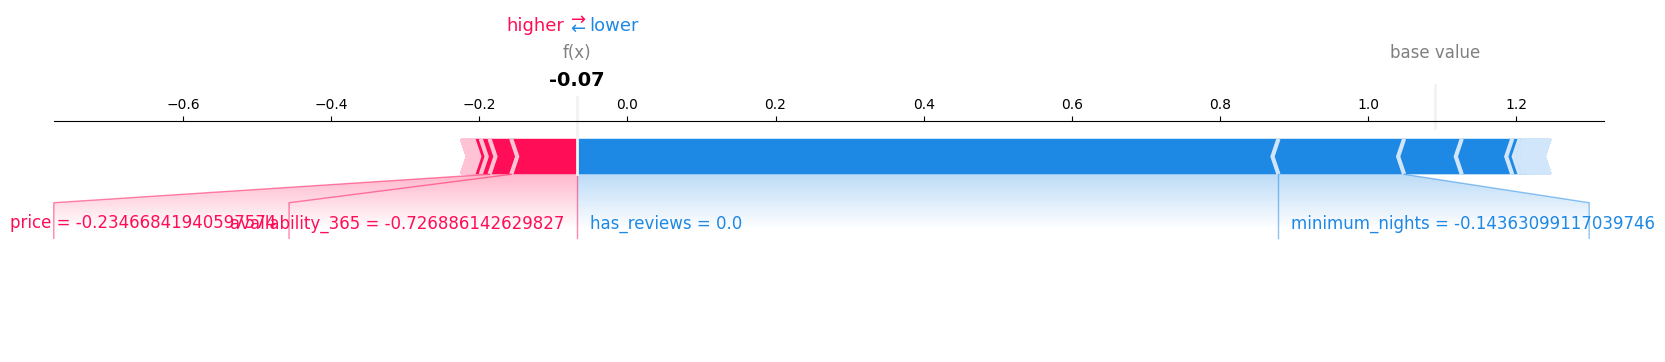

In [287]:
shap.initjs()
shap.force_plot(
    xgb_explainer.expected_value,
    train_xgb_shap_values[0],
    X_train_enc.iloc[0, :],
    matplotlib=True
)

In [298]:
pd.DataFrame(
    train_xgb_shap_values[0, :],
    index=feature_names,
    columns=["SHAP values"],
)

,SHAP values
latitude,-0.068127
longitude,0.004558
price,0.029352
minimum_nights,-0.169631
calculated_host_listings_count,-0.010064
...,...
neighbourhood_Woodlawn,-0.000060
neighbourhood_Woodrow,0.000000
neighbourhood_Woodside,-0.000776
room_type,0.011831


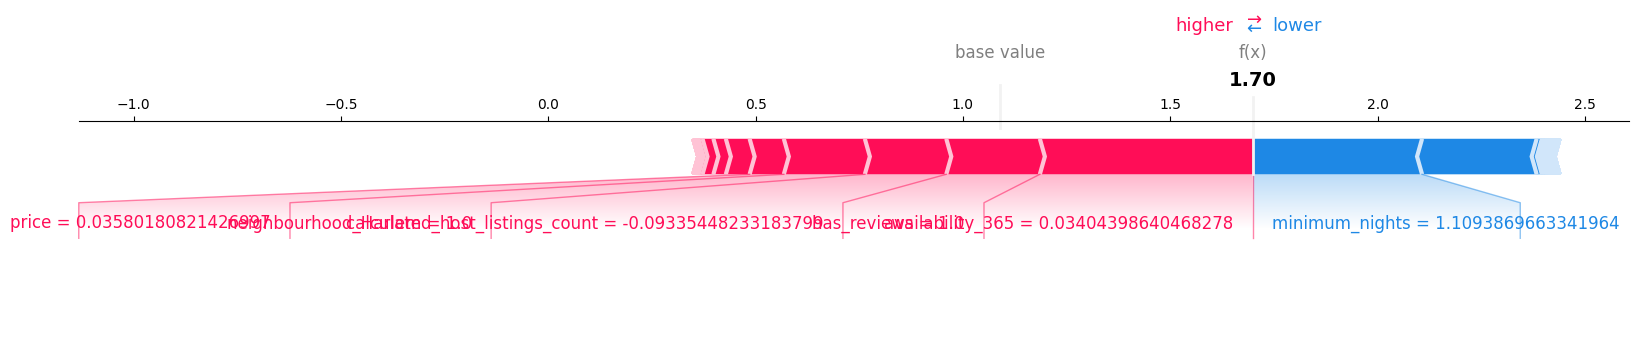

In [291]:
shap.force_plot(
    xgb_explainer.expected_value,
    train_xgb_shap_values[10],
    X_train_enc.iloc[10, :],
    matplotlib=True
)

In [299]:
pd.DataFrame(
    train_xgb_shap_values[10, :],
    index=feature_names,
    columns=["SHAP values"],
)

,SHAP values
latitude,-0.026155
longitude,0.008844
price,-0.055536
minimum_nights,-0.215631
calculated_host_listings_count,0.074144
...,...
neighbourhood_Woodlawn,-0.000144
neighbourhood_Woodrow,0.000000
neighbourhood_Woodside,-0.001465
room_type,0.049686


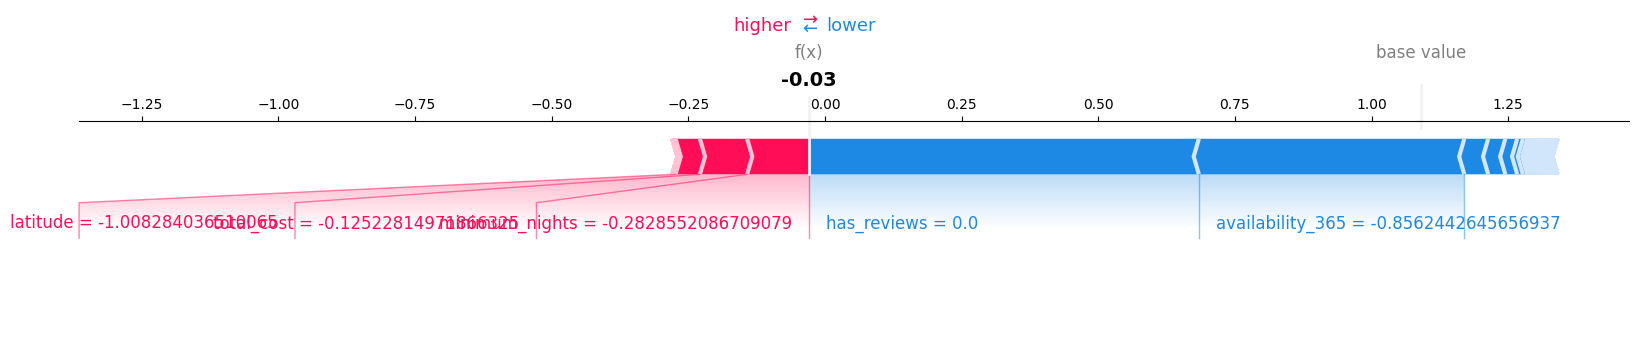

In [289]:
shap.force_plot(
    xgb_explainer.expected_value,
    train_xgb_shap_values[100],
    X_train_enc.iloc[100, :],
    matplotlib=True
)

In [300]:
pd.DataFrame(
    train_xgb_shap_values[100, :],
    index=feature_names,
    columns=["SHAP values"],
)

,SHAP values
latitude,0.044540
longitude,-0.001099
price,-0.043612
minimum_nights,0.113274
calculated_host_listings_count,-0.021727
...,...
neighbourhood_Woodlawn,-0.000319
neighbourhood_Woodrow,0.000000
neighbourhood_Woodside,-0.000198
room_type,-0.031406


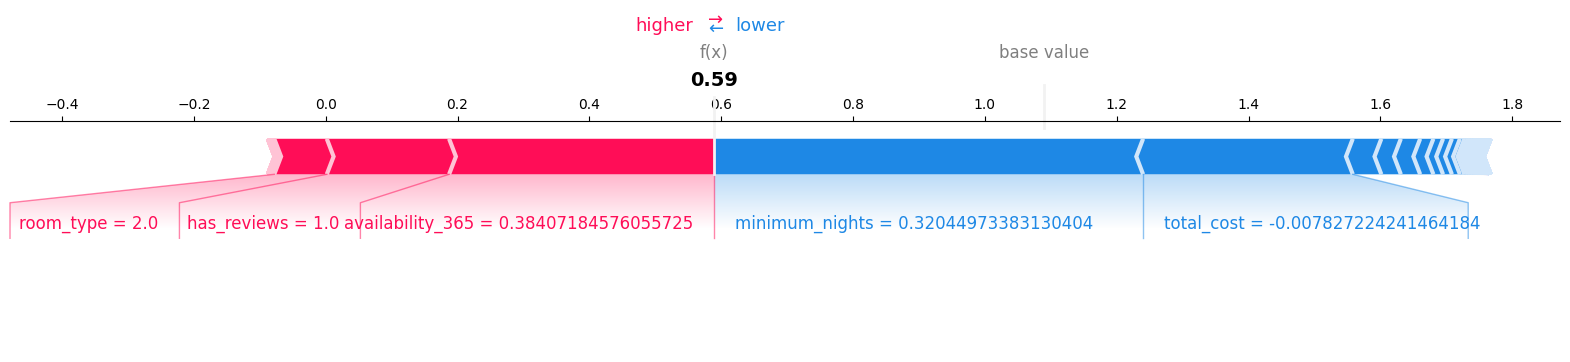

In [290]:
shap.force_plot(
    xgb_explainer.expected_value,
    train_xgb_shap_values[1000],
    X_train_enc.iloc[1000, :],
    matplotlib=True
)

In [301]:
pd.DataFrame(
    train_xgb_shap_values[0, :],
    index=feature_names,
    columns=["SHAP values"],
)

,SHAP values
latitude,-0.068127
longitude,0.004558
price,0.029352
minimum_nights,-0.169631
calculated_host_listings_count,-0.010064
...,...
neighbourhood_Woodlawn,-0.000060
neighbourhood_Woodrow,0.000000
neighbourhood_Woodside,-0.000776
room_type,0.011831


The most important features are has_review, minimum_nights and availability_365

the raw score is much lower whenever has_review is 0. In cases of 0, the feature greatly pushes prediction towards lower score. This makes sense and is self explanatory considering the target

Large values of minimum_nights also push the prediction towards lower score. My interpretation is that the model thinks that most people want to stay only a few nights and thus the lower minimum_nights is, the more people will choose the AirBnB and hence more reviews.

Large values of availability_365 push the prediction towards higher score. The interpretation this time is that the model thinks most people book in advance leaking to listings with better availability to have more stays thus reviews.




<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [292]:
xgb_tuned_pipe.fit(X_train, y_train)
xgb_tuned_pipe.score(X_test, y_test)

0.4749318187150485

In [293]:
xgb_tuned_scores['test_score'].mean()

0.47750779029344426

The test score is in line with mean cross-validation score. In terms of trust, I trust that real world perform will be similar to the test score because there was no violation of the golden rule and optimization bias is minimized due to the size of the dataset. But the score is still quite low so I would not trust the model to perform well in the real world.

In [302]:
X_test_enc = pd.DataFrame(
    data=ct.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index,
)
test_lgbm_shap_values = xgb_explainer.shap_values(X_test_enc)

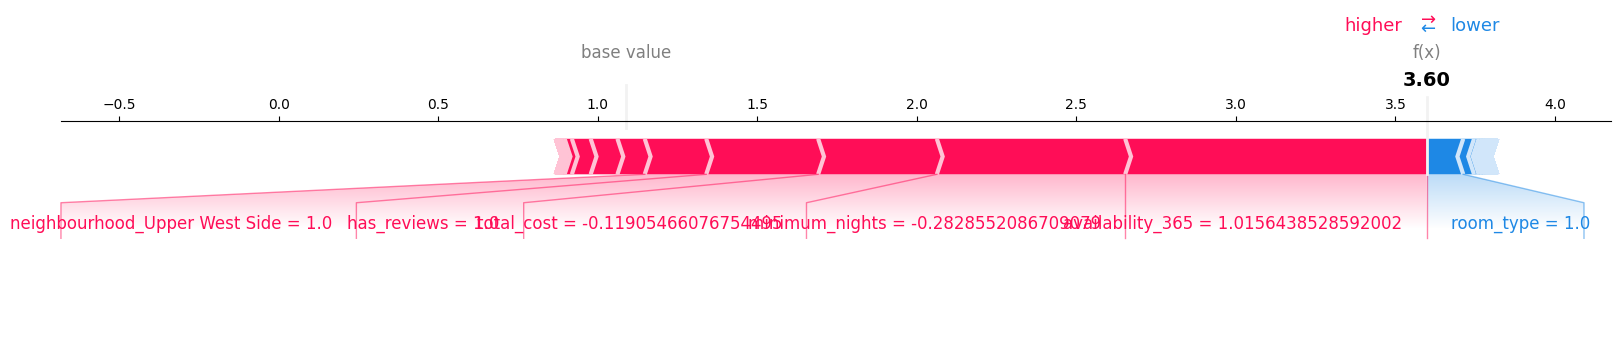

In [308]:
shap.force_plot(
    xgb_explainer.expected_value,
    test_lgbm_shap_values[3, :], 
    X_test_enc.iloc[3, :],
    matplotlib=True,
)

According to the SHAP plot, the model predicts high number of review for a listing with high availability, has been reviewed before, low minimum nights requirement and low total cost.

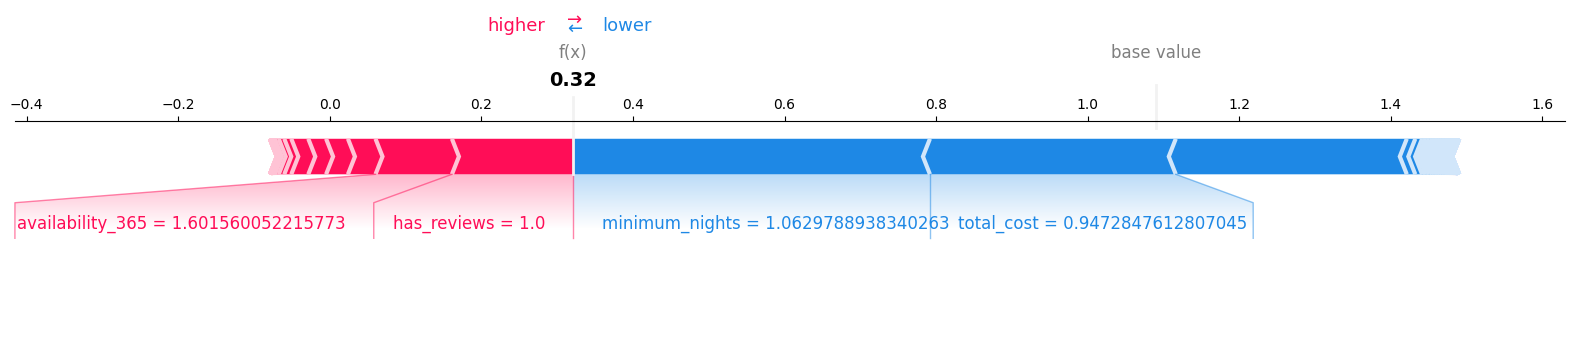

In [317]:
shap.force_plot(
    xgb_explainer.expected_value,
    test_lgbm_shap_values[103, :], 
    X_test_enc.iloc[103, :],
    matplotlib=True,
)

According to this SHAP plot, the model predicts low number of reviews for a listing with very high minimum nights requirements and high total cost. The prediction is counteracted slightly because the listing has high availability and has been reviewed before.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

| Best Model              |                  | XGBoostRegressor                                                                                  |
|-------------------------|------------------|---------------------------------------------------------------------------------------------------|
| Best Hyperparameters    | colsample_bytree | 0.7114458087473529                                                                                |
|                         | gamma            | 1.6023770233508976                                                                                |
|                         | learning_rate    | 0.06237424104272269                                                                               |
|                         | max_depth        | 10.0                                                                                              |
|                         | n_estimators     | 200.0                                                                                             |
|                         | subsample        | 0.8995702058475897                                                                                |
| Evaluation Metric       |                  | Accuracy                                                                                          |
| Final Test Score        |                  | 0.4749318187150485                                                                                |
| Feature Types           | numeric          | latitude, longitude, price, minimum_nights, calculated_host_listing, availability_365, total_cost |
|                         | categorical      | neighbourhood, neighbourhood_group                                                                |
|                         | ordinal          | room_type                                                                                         |
|                         | binary           | has_review                                                                                        |
|                         | drop             | id, host_id, name, host_name, last_review, number_of_reviews                                      |
| Most Important Features |                  | has_review, availability_365, minimum_nights                                                      |

Concluding remarks
The score from our model is not great and we believe it will perform as expected in the real world, which is also not great. 
We think it comes down to inadequate feature engineering as we have done pretty exhaustive searches to optimize hyperparamters. We could also improve interpretability by removing the OHE features which occupied most of the columns, but doing so reduced our test scores which is why they remained.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Some models are better suited for certain problems. For example, doing hyperparamter optimization on SVR and getting a final cross-validation score took almost an hour. The worst part is that the model produced worse test score compared to a simple decision tree model which took a fraction of the time to train.
Also, depsite our best efforts to optimize hyperparamters, the final score is not great. We suspect a better score is possible and it all comes down to feature engineering. We've discussed that a lot if not most of the time for these tasks is spent on working on the dataset and this assignment confirms that.

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)